<a href="https://colab.research.google.com/github/nfonteyne/Audio_Sample_Listenable/blob/main/RF_classSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ce Notebook présente une autre méthode de ml nous permettant de réaliser une classification des échantillons audios

✋J'ai réutilisé mon algo de P4A pour faire ce modèle mais je ne l'ai pas encore commenté. Vous pouvez me poser des questions dessus le temps que j'ajoute toutes les infos.

### Import des bibliothèques

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd
from librosa import feature


In [ ]:
from glob import glob
data_dir = '.'
audio_files = glob('./*.wav')
len(audio_files)

299

In [ ]:
fn_list_i = [
        feature.chroma_stft,
        feature.spectral_centroid,
        feature.spectral_bandwidth,
        feature.spectral_rolloff,
      ]
      
fn_list_ii = [
            feature.zero_crossing_rate
            ]
      
def get_feature_vector(y,sr):  
  feat_vect_i = [ np.mean(funct(y,sr)) for funct in fn_list_i]
  feat_vect_ii = [ np.mean(funct(y)) for funct in fn_list_ii]
      
  feature_vector =   feat_vect_i + feat_vect_ii  
  return feature_vector
    
    #build the matrix with normal audios featurized
audios_feat = []
name_list = []
for file in audio_files:
  '''
  y is the time series array of the audio file, a 1D np.ndarray
  sr is the sampling rate, a number
  '''  
  y,sr = librosa.load(file,sr=None)   
  feature_vector = get_feature_vector(y, sr) 
  audios_feat.append(feature_vector)
  filename = int(str(file)[2:-4])
  name_list.append(int(str(file)[2:-4]))  
  #print('.', end= " ")
      
  #print(audios_feat)
      #.........................
# import csv
    
# norm_output = 'normals_00.csv'
    
    
header =[
        'chroma_stft',
        'spectral_centroid',
        'spectral_bandwidth',
        'spectral_rolloff',
        'zero_crossing_rate',
        ]
    
# #WARNING : this overwrites the file each time. Be aware of this because feature extraction step takes time.
# with open(norm_output,'+w') as f:
#   csv_writer = csv.writer(f, delimiter = ',')
#   csv_writer.writerow(header)
#   csv_writer.writerows(audios_feat)

/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2000
  n_fft, y.shape[-1]


In [ ]:
features = pd.DataFrame(audios_feat, columns = header);
name_feature =pd.DataFrame(name_list, columns = ["name"])
features['name']= name_feature


In [ ]:
features = features.sort_values(by=['name'])
features.reset_index(drop=True, inplace=True)

In [ ]:
features.head()

,chroma_stft,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,name
0,0.608430,2942.983569,2459.215708,5576.131825,0.082947,0
1,0.499858,2945.486981,2501.593221,4742.869448,0.106967,57
2,0.327625,2922.354899,2858.299224,5670.832376,0.069548,94
3,0.442552,2564.279030,2547.783075,4764.157858,0.079665,110
4,0.061541,154.942156,145.966018,304.400147,0.004079,135


In [ ]:
datacomp=pd.read_csv("Labels3files.csv",sep=";")

In [ ]:
datacomp['Moyenne ']=datacomp['Moyenne '].str.replace(',','.')
datacomp['Moyenne ']=datacomp['Moyenne '].astype(float)
datacomp.rename(columns = {'Moyenne ':'Moyenne'}, inplace = True)

In [ ]:
datacomp.Moyenne = [0 if i<-1.2 else 1 if i<-0.4 else 2 if i<0.4 else 3 if i<1.2 else 4 for i in datacomp.Moyenne]
datacomp['MedianeBin'] = [0 if i<1 else 1 for i in datacomp.Mediane]
datacomp['MedianeBin'] = datacomp['MedianeBin'].astype(int)
datacomp.Mediane = [0 if i==-2 else 1 if i==-1 else 2 if i==0 else 3 if i==1 else 4 for i in datacomp.Mediane]
#on adapte nos labels pour notre classification

In [ ]:
features.head()

,chroma_stft,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,name
0,0.608430,2942.983569,2459.215708,5576.131825,0.082947,0
1,0.499858,2945.486981,2501.593221,4742.869448,0.106967,57
2,0.327625,2922.354899,2858.299224,5670.832376,0.069548,94
3,0.442552,2564.279030,2547.783075,4764.157858,0.079665,110
4,0.061541,154.942156,145.966018,304.400147,0.004079,135


In [ ]:
datacomp.Mediane.unique()

array([3, 2, 4, 0, 1])

In [ ]:
datacomp.Mediane.value_counts()

3    88
4    81
1    50
2    43
0    37
Name: Mediane, dtype: int64

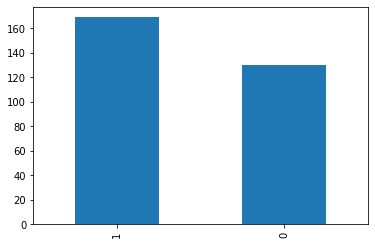

In [ ]:
datacomp['MedianeBin'].value_counts().plot(kind='bar')

In [ ]:
features['Mediane'] = datacomp['Mediane']
features['Moyenne'] = datacomp['Moyenne']
features['MedianeBin'] = datacomp['MedianeBin']


In [ ]:
features.to_csv('featuresRF.csv')  

In [ ]:
def parse_model_0(X: pd.DataFrame):
  target = X[['Moyenne ']]
  X = X[['chroma_stft', 'spectral_centroid', 'spectral_centroid','spectral_rolloff','zero_crossing_rate']]
  return X, target

In [ ]:
# split into training set and testing set
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report

# set random_state to get the same split every time
traindf, testdf = train_test_split(features, test_size=0.2, random_state=42)

In [ ]:
datacomp['MedianeBin']

0      1
1      0
2      1
3      1
4      1
      ..
294    1
295    0
296    0
297    1
298    1
Name: MedianeBin, Length: 299, dtype: int64

In [ ]:
y_train=traindf[['MedianeBin']]
X_train=traindf[['chroma_stft', 'spectral_centroid', 'spectral_centroid','spectral_rolloff','zero_crossing_rate']]

y_test=testdf[['MedianeBin']]
X_test=testdf[['chroma_stft', 'spectral_centroid', 'spectral_centroid','spectral_rolloff','zero_crossing_rate']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 

In [ ]:
from sklearn.model_selection import cross_val_score
def compute_score(clf, X: pd.DataFrame, y: pd.Series) -> float:
  xval = cross_val_score(clf, X, y, cv = 5)
  return np.mean(xval), np.std(xval)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=1000)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

compute_score(regressor, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was

0.6666666666666666

In [ ]:
y_test_hat = regressor.predict(X_test)
#y_test_hat_probs = regressor.predict_proba(X_test)[:,1]

test_accuracy = accuracy_score(y_test, y_test_hat)*100
#test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))

#print('Testing AUC: %.4f %%' % test_auc_roc)

print('Testing accuracy: %.4f %%' % test_accuracy)

Confusion matrix:
 [[18  6]
 [ 8 28]]
Testing accuracy: 76.6667 %
